Hyper-Q Product Testing - Analytical Report - LEM

In [1]:
import subprocess
import sys

sys.path.append("..")
sys.path.append("../../analysis")

hyper = True
episodes = 2000
interval = 100
warmups=1000
dyna_size = 250
q_type = "q"
memory = 1000
policy = "onpolicy"
obsession = True
randomize = True
dump = False

title = "LEM"
project_title = ""
if hyper :
    title = f"{title} Hyper "
    project_title = "hyper"

title = f"{title} {q_type.upper()} Heatmap e{episodes} w{warmups} m{memory}"
project_title = f"{project_title}-{q_type}-{episodes}x{interval}-{policy}-w{warmups}-mem{memory}"

if dyna_size > 0 :
    title = f"{title} {dyna_size} Dyna x 75"
    project_title = f"{project_title}-dyna-{dyna_size}-75"
else :
    title = f"{title} No Dyna"

if obsession:
    title = f"{title} Obsession"
    project_title = f"{project_title}-obsession"


In [2]:

with open("input.in","w") as fp :
    fp.write(f"{episodes}\n")
    fp.write(f"{interval}\n")
    fp.write(f"memory_size={memory}\n")
    fp.write("episodic\n")
    fp.write(f"{policy}\n")
    if(hyper) :
        fp.write("hyper\n")
    #LEM does not have a positive reward enough to make this worthy
    #fp.write("negpos\n")
    if(randomize) :
        fp.write("randomize\n")
    if(obsession) :
        fp.write("obsession\n")
    fp.write(f"dyna_size={dyna_size}\n")
    fp.write("dyna_iters=75\n")
    fp.write(f"warmup={warmups}\n")
    fp.write("a=1,.9999997,.65\n")
    fp.write("g=0.997,1\n")
    fp.write("e=0.9,.9999991,.1\n")
    fp.write("h=0.6,.99999991,0.0\n")
    fp.write(f"{q_type}\n")



In [3]:
s = subprocess.check_output(["../Game/bin/x64/Release/LEM.exe","/in=input.in"],stderr=subprocess.STDOUT)
o = s.decode('utf-8')
print(o)



Reading input from input.in
cmdline: 2000
cmdline: 100
cmdline: memory_size=1000
cmdline: episodic
cmdline: onpolicy
cmdline: hyper
cmdline: randomize
cmdline: obsession
cmdline: dyna_size=250
cmdline: dyna_iters=75
cmdline: warmup=1000
cmdline: a=1,.9999997,.65
cmdline: g=0.997,1
cmdline: e=0.9,.9999991,.1
cmdline: h=0.6,.99999991,0.0
cmdline: q
g=0.997, decay=1, min=0.997
e=0.9, decay=0.9999991, min=0.1
a=1, decay=0.9999997, min=0.65
t=0.95, decay=1, min=0.95
Q enabled
HYPER enabled
Dyna enabled 250
Dyna freq 0.2
Memory enabled 1000 EPISODIC
warmups enabled 1000
ON Policy Evaluation
Randomizing training Worlds
==Q==
Num Actions=1921/1921, state offset=0, action offset=0
== Env Metrics ==
   Total Reward: -412.196904749502
   Average Reward: -231.770692825369 over 2021 episodes
   # Actions Taken: 33
   Episodes Take: 82.84 ms
   Total Episode Time: 167412.34 ms
   Reminiscing Takes: 51.00 ms
   Total Reminiscing Time: 101993.46 ms (60.92 %)
   Action Selection Takes: 0.00 ms
   Total

In [4]:
import asciiv
colors = {
    '+' : (255,255,255),
    '-' : (255,255,255),
    '/' : (255,255,255),
    '\\' : (255,255,255),
    '~' : (0,255,0),
    '*' : (255,0,0)
}

import os
ir = range(interval-1,episodes,interval)
for i in ir :
    fname = f'eval-{i}-{episodes}x{interval}-{policy}.log'
    gif_name = f'eval-{i}-{episodes}x{interval}-{policy}.gif'
    if os.path.exists(fname) :
        # Parse log file into frames
        log_frames = asciiv.parse_log_file(fname)

        # Render frames into images
        image_frames = [asciiv.render_frame(frame,colors=colors) for frame in log_frames]

        # Create animated GIF
        asciiv.create_animated_gif(image_frames, gif_name)
        print(gif_name)

fname = f'eval-best-{episodes}x{interval}-{policy}.log'
gif_name = f'eval-best-{episodes}x{interval}-{policy}.gif'
if os.path.exists(fname) :
    # Parse log file into frames
    log_frames = asciiv.parse_log_file(fname)

    # Render frames into images
    image_frames = [asciiv.render_frame(frame,colors=colors) for frame in log_frames]

    # Create animated GIF
    asciiv.create_animated_gif(image_frames, gif_name)
    print(gif_name)

eval-99-2000x100-onpolicy.gif
eval-199-2000x100-onpolicy.gif
eval-299-2000x100-onpolicy.gif
eval-399-2000x100-onpolicy.gif
eval-499-2000x100-onpolicy.gif
eval-599-2000x100-onpolicy.gif
eval-699-2000x100-onpolicy.gif
eval-799-2000x100-onpolicy.gif
eval-899-2000x100-onpolicy.gif
eval-999-2000x100-onpolicy.gif
eval-1099-2000x100-onpolicy.gif
eval-1199-2000x100-onpolicy.gif
eval-1299-2000x100-onpolicy.gif
eval-1399-2000x100-onpolicy.gif
eval-1499-2000x100-onpolicy.gif
eval-1599-2000x100-onpolicy.gif
eval-1699-2000x100-onpolicy.gif
eval-1799-2000x100-onpolicy.gif
eval-1899-2000x100-onpolicy.gif
eval-1999-2000x100-onpolicy.gif
eval-best-2000x100-onpolicy.gif


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates


In [6]:

import HeatMap

#
# Load the files manifest and process the heatmaps for each files
# The matrix from LEM is very very very very large. Only sample some of
# the actions to keep the display coherence readable
#
actions = [5, 12, 28, 36, 75, 89, 110, 175, 250, 310, 476, 520, 650, 721]
with open("frames.txt") as fp:
    l = fp.readlines()
    fig,ax = plt.subplots(figsize=(11,8))
    ylabels = [f'#{i}' for i in actions]
    # ylabels = [f'{i}' for i in range(1921)]
    png_files = []
    for s in l :
        s = s.strip()
        print(f'Reading matrix file {s}')
        q1 = np.loadtxt(s,delimiter=',',usecols=actions)
        fig,ax1 = plt.subplots(figsize=(11,8))
        im,_ = HeatMap.heatmap(q1.T, ylabels,None,ax=ax1,cmap="RdBu",cbarlabel=f"{q_type.upper()} Value",aspect='auto')
        ax1.title.set_text(title)
        fname = s.replace(".csv","_heatmap.png")
        fig.savefig(fname, facecolor=fig.get_facecolor())
        png_files.append(fname)
        plt.close(fig)
plt.close()



In [7]:
import animate
animation_file = f'LEM-{project_title}.gif'
ai = None
if len(png_files) > 0 :
    ai = animate.animate(".",png_files,output_path=animation_file)

In [8]:
from IPython.display import Image

In [9]:
if not ai is None :
    Image(url=ai)

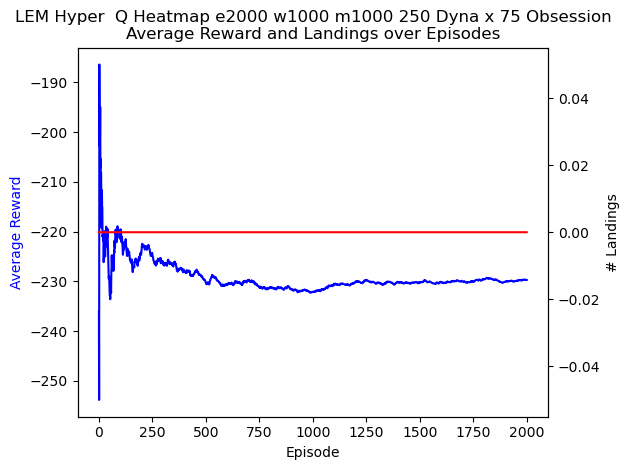

In [10]:

q1 = pd.read_csv(f"lem-result-{episodes}.csv",sep=',',header=0)
fig,ax1 = plt.subplots()
color = "blue"
ax1.set_xlabel("Episode")
ax1.set_ylabel("Average Reward", color=color)
ax1.plot(q1["avgreward"],color=color)
ax2 = ax1.twinx()
color = "red"
ax2.set_ylabel("# Landings")
ax2.plot(q1["landed"],color=color)
plt.title(f'{title}\nAverage Reward and Landings over Episodes')
fig.tight_layout()
fig_filename = f"{project_title}-Reward-Landing-Analysis.png"
fig.savefig(fig_filename, facecolor=fig.get_facecolor())
plt.show()

In [11]:
landingpct = q1.landed.max() / q1.shape[0]
print(f'Landing pct={landingpct*100.0}')
q1.describe()

Landing pct=0.0


,crashed,freefall,landing,landed,totalreward,avgreward,epsilon,alpha
count,2000.000000,2000.0,2000.0,2000.0,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.0,0.0,0.0,-231.663050,-229.168220,0.899190,0.999700
std,577.494589,0.0,0.0,0.0,76.312585,3.239649,0.000467,0.000173
min,1.000000,0.0,0.0,0.0,-1016.025372,-253.828664,0.898381,0.999400
25%,500.750000,0.0,0.0,0.0,-277.820616,-230.545561,0.898786,0.999550
50%,1000.500000,0.0,0.0,0.0,-238.311924,-230.105413,0.899190,0.999700
75%,1500.250000,0.0,0.0,0.0,-192.982262,-229.315812,0.899594,0.999850
max,2000.000000,0.0,0.0,0.0,38.274344,-186.404038,0.899999,1.000000


In [13]:
import graphit

gfname = f'lem-telemetry-{episodes}-final.csv'
window = 10000
goutput = f'lem-{episodes}-analysis.png'

In [14]:
graphit.dograph(gfname, window, goutput)

Average reward from hitting the surface: -229.4778550673857 +/- 66.01208945557259
Bounds of reward from hitting the surface: [-372.101077297478 , 38.2743440453206]
Average speed at surface impact: 0.2733875986571004 +/- 0.05809461209738349
Average reward from fuel outage: -246.32544602591042 +/- 159.25596991048494
Bounds of reward from fuel outage: [-533.235349689168 , 11.9972527638337]


['[LEM] Average reward from hitting the surface: -229.4778550673857 +/- 66.01208945557259',
 '[LEM] Bounds of reward from hitting the surface: [-372.101077297478 , 38.2743440453206]',
 '[LEM] Average speed at surface impact: 0.2733875986571004 +/- 0.05809461209738349',
 '[LEM] Average reward from fuel outage: -246.32544602591042 +/- 159.25596991048494',
 '[LEM] Bounds of reward from fuel outage: [-533.235349689168 , 11.9972527638337]']

In [15]:
Image(url=goutput)